In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('german_credit.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [5]:
df.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [7]:
df.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [8]:
t = df[df['Creditability']==1]

f= df[df['Creditability']==0]
print(t.shape)
print(f.shape)

(700, 21)
(300, 21)


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


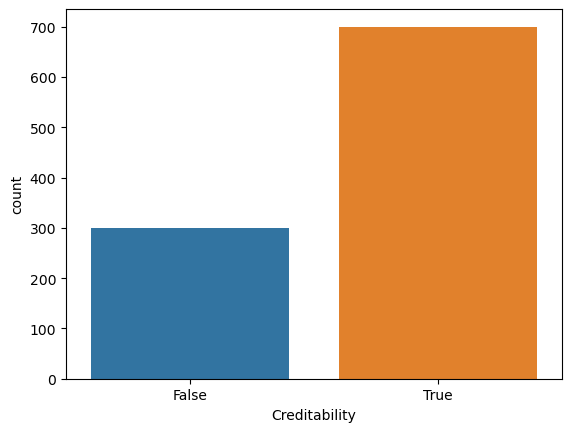

In [9]:
sns.countplot(df['Creditability']==1)
plt.show()

In [10]:
!pip install imblearn

In [11]:
import imblearn
from collections import Counter

In [12]:
X = df.drop(['Creditability'],axis=1)
y = df['Creditability']

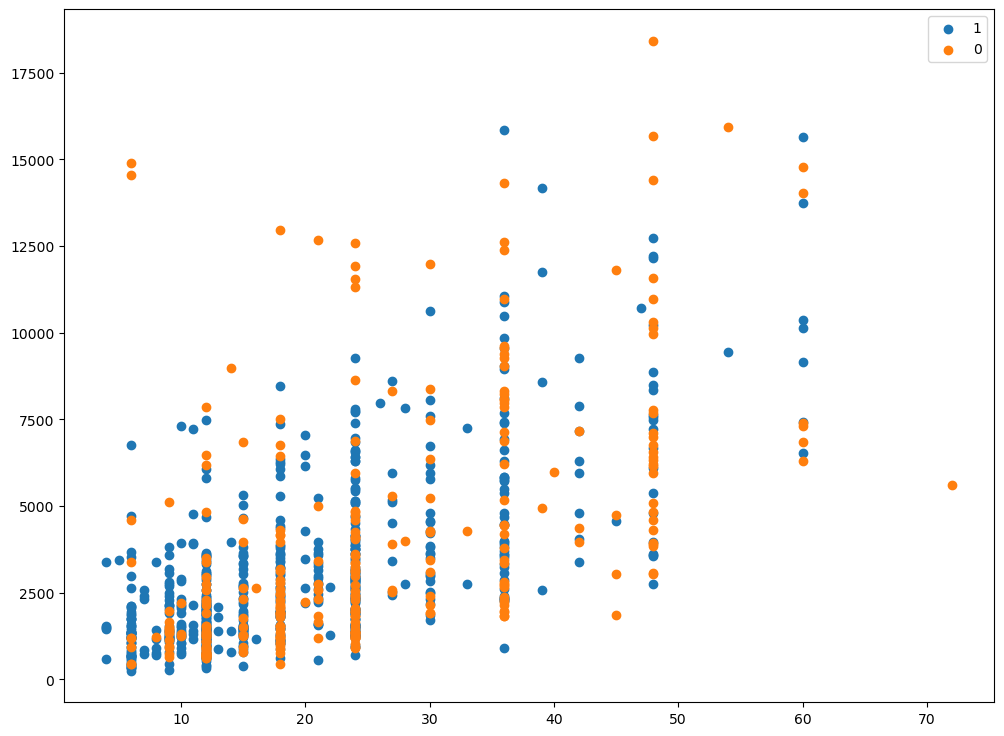

In [13]:
#target colums plot(just to know  the distribution)
# the Counter.items()helps  to see the elements of the list along with their freguences in a tuple.

plt.figure(figsize = (12,9))
counter = Counter(y)
for label,_ in counter.items():
    row_ix = np.where(y==label)[0]
    plt.scatter(X.loc[row_ix,"Duration of Credit (month)"],X.loc[row_ix,"Credit Amount"],label=str(label))
plt.legend()
#plt.savefig('o.png')
plt.show()

Before undersample df shape Counter({1: 700, 0: 300})
After undersample df shhape Counter({0: 300, 1: 300})


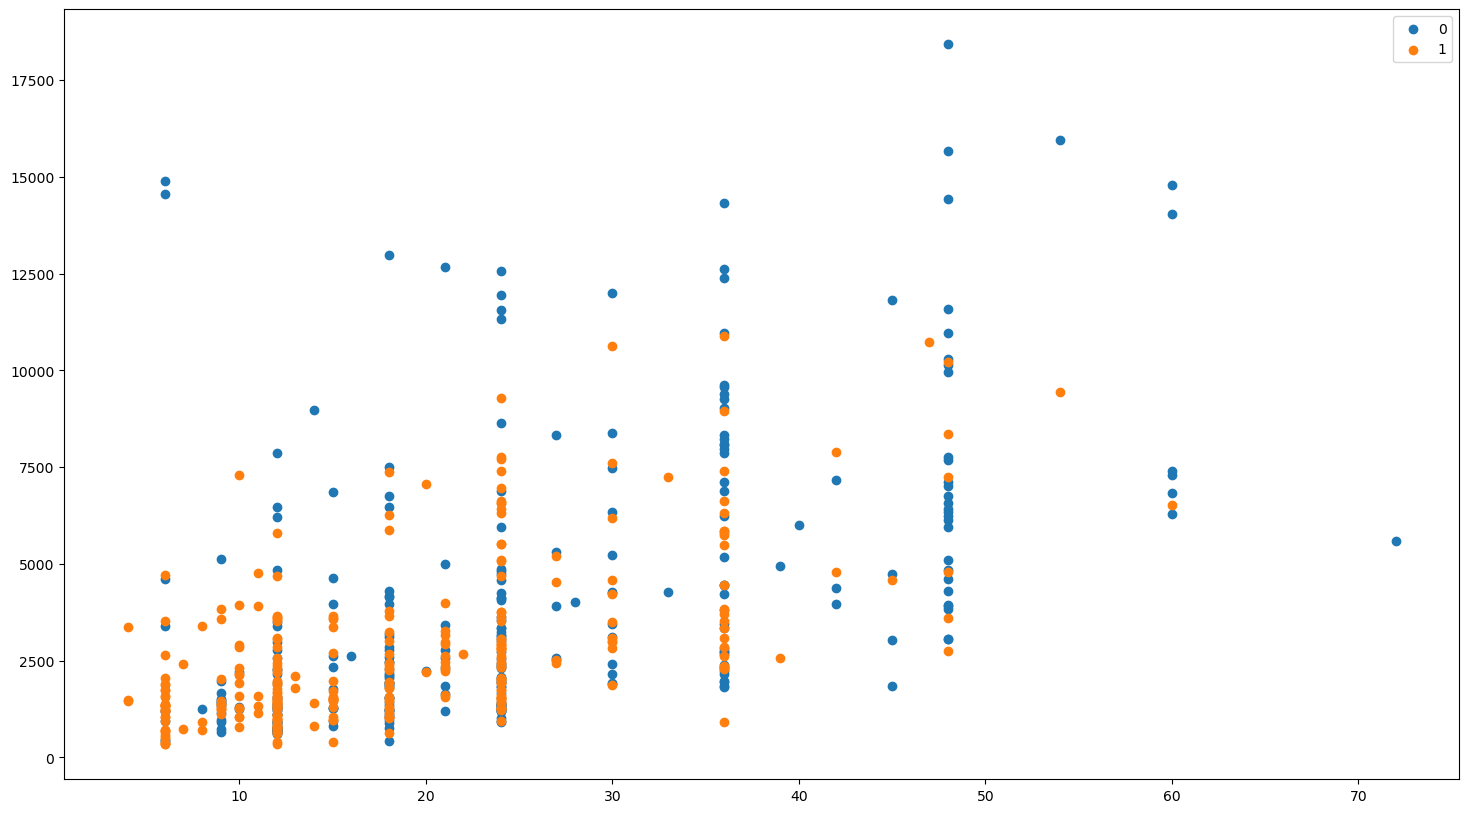

In [14]:
 from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state=42)
print('Before undersample df shape %s'%Counter(y))

X_res,y_res = rs.fit_resample(X,y)
print('After undersample df shhape %s'%Counter(y_res))


plt.figure(figsize = (18,10))
counter = Counter(y_res)
for label,_ in counter.items():
    row_ix = np.where(y_res==label)[0]
    plt.scatter(X_res.loc[row_ix,"Duration of Credit (month)"],X_res.loc[row_ix,"Credit Amount"],label=str(label))
plt.legend()
#plt.savefig('o.png')
plt.show()


UNDERSAMPLING METHOD2 :centroid based choose centriod(in equal centriod (n is equal to no of minority class values)of majority class


Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({0: 300, 1: 300})


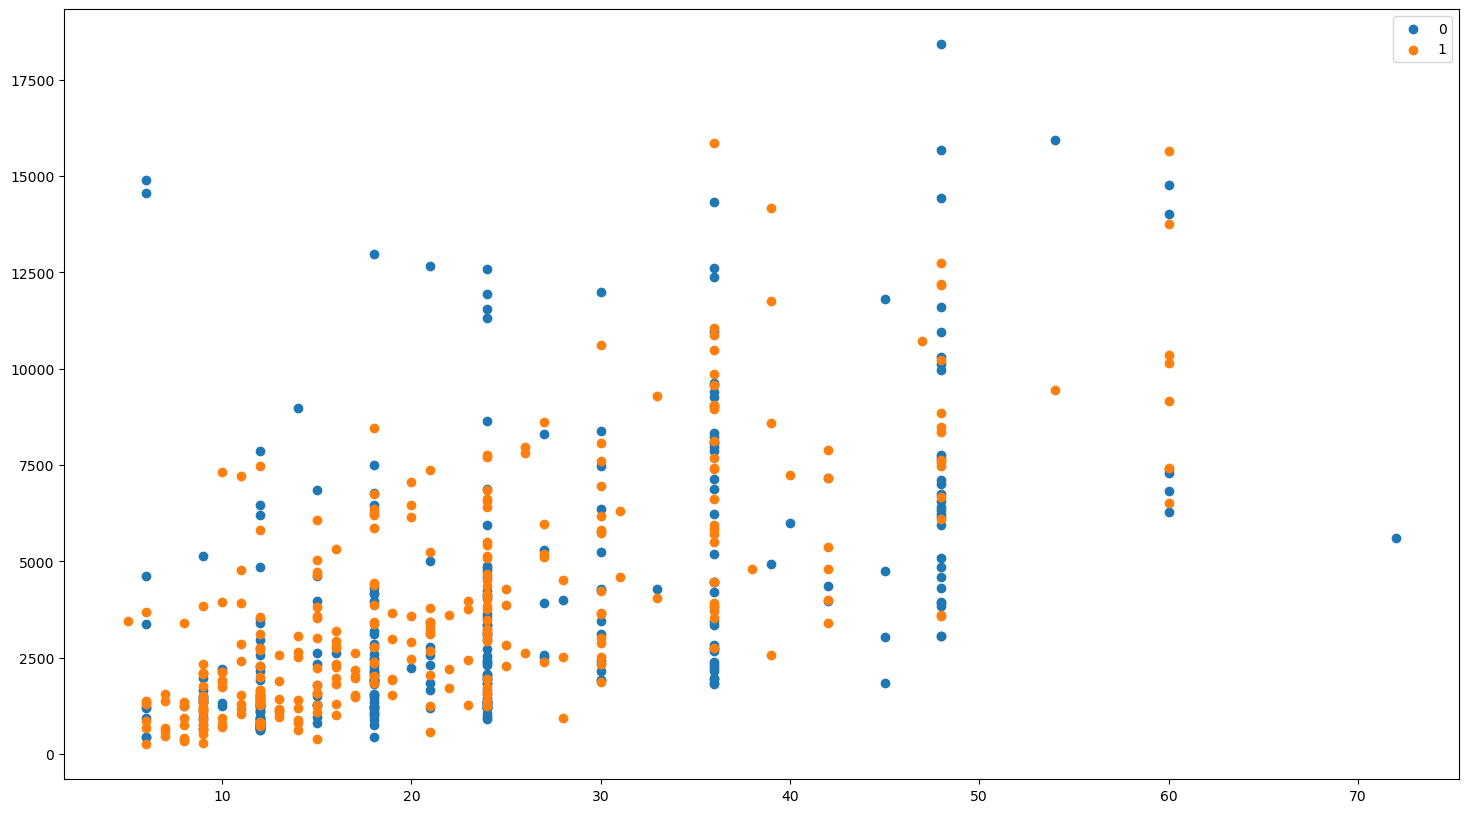

In [15]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=42)

print("Original dataset shape %s" %Counter(y))

X_res, y_res = cc.fit_resample(X,y)

print("After undersample dataset shape %s"%Counter(y_res))

# scater plot by class label
plt.figure(figsize = (18,10))
counter = Counter(y_res)
for label,_ in counter.items():
    row_ix = np.where(y_res==label)[0]
    plt.scatter(X_res.loc[row_ix,"Duration of Credit (month)"],X_res.loc[row_ix,"Credit Amount"],label=str(label))
plt.legend()
#plt.savefig('o.png')
plt.show()


Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({0: 300, 1: 271})


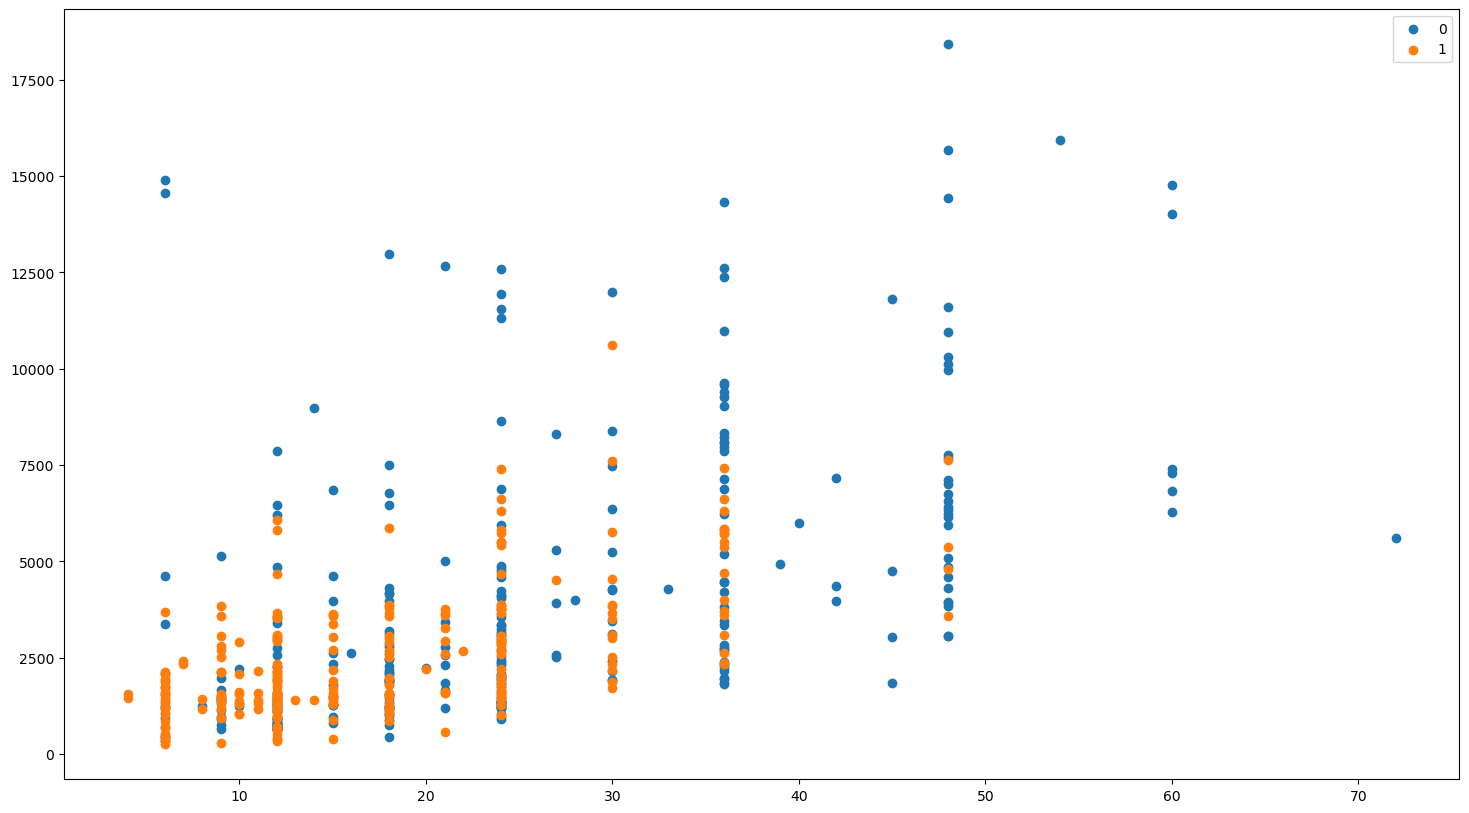

In [16]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
print('Original dataset shape %s'%Counter(y))
X_res,y_res = enn.fit_resample(X,y)
print('After undersample dataset shape %s'%Counter(y_res))
 
    #scater plot by class label
plt.figure(figsize = (18,10))
counter = Counter(y_res)
for label,_ in counter.items():
    row_ix = np.where(y_res==label)[0]
    plt.scatter(X_res.loc[row_ix,"Duration of Credit (month)"],X_res.loc[row_ix,"Credit Amount"],label=str(label))
plt.legend()
#plt.savefig('o.png')
plt.show()



Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({1: 700, 0: 700})


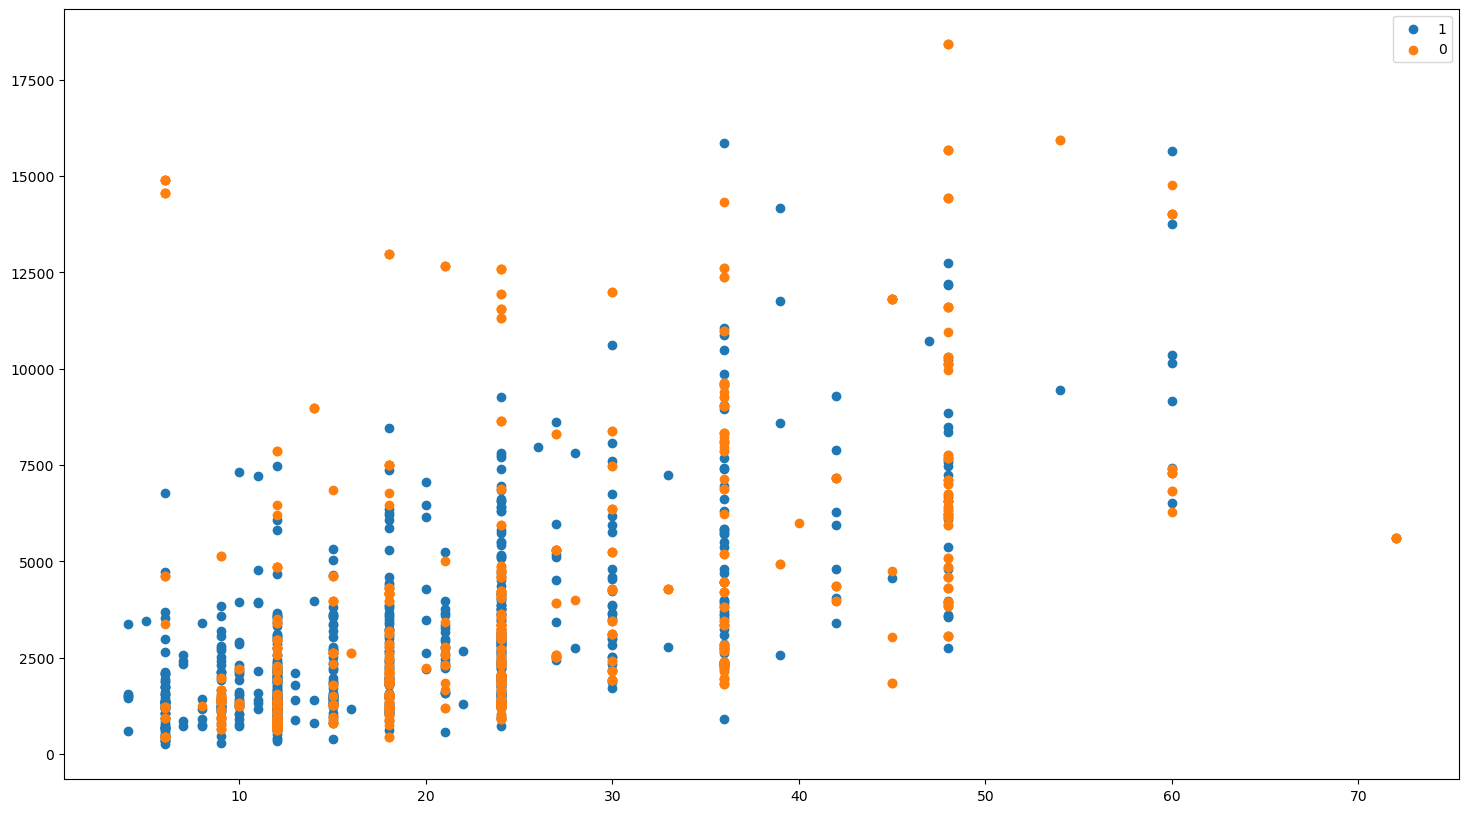

In [18]:
from imblearn.over_sampling import RandomOverSampler 
ROS = RandomOverSampler()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = ROS.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({1: 700, 0: 700})


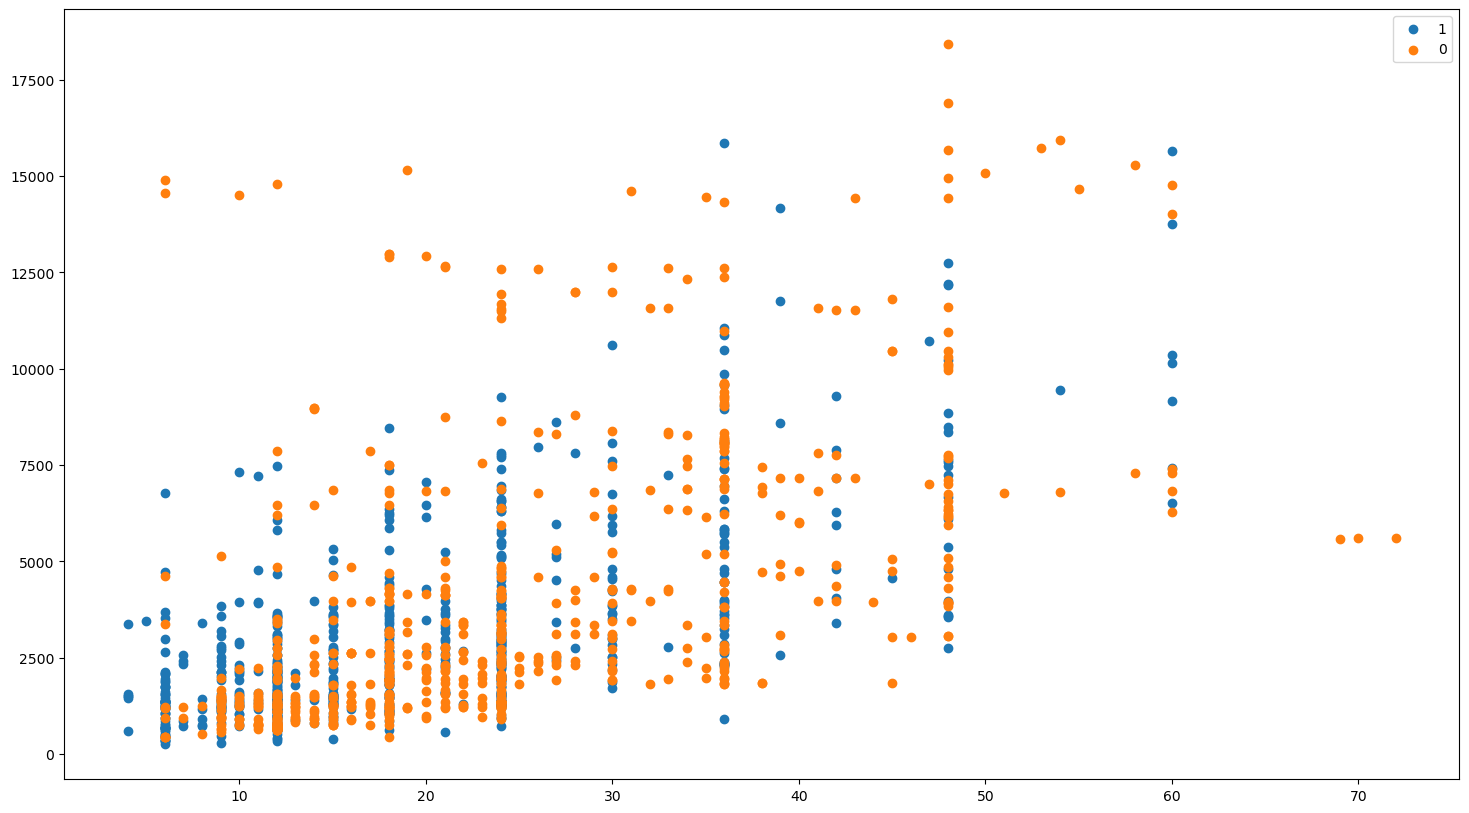

In [19]:
from imblearn.over_sampling import SMOTE 
SMOTE = SMOTE()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = SMOTE.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({0: 318, 1: 209})


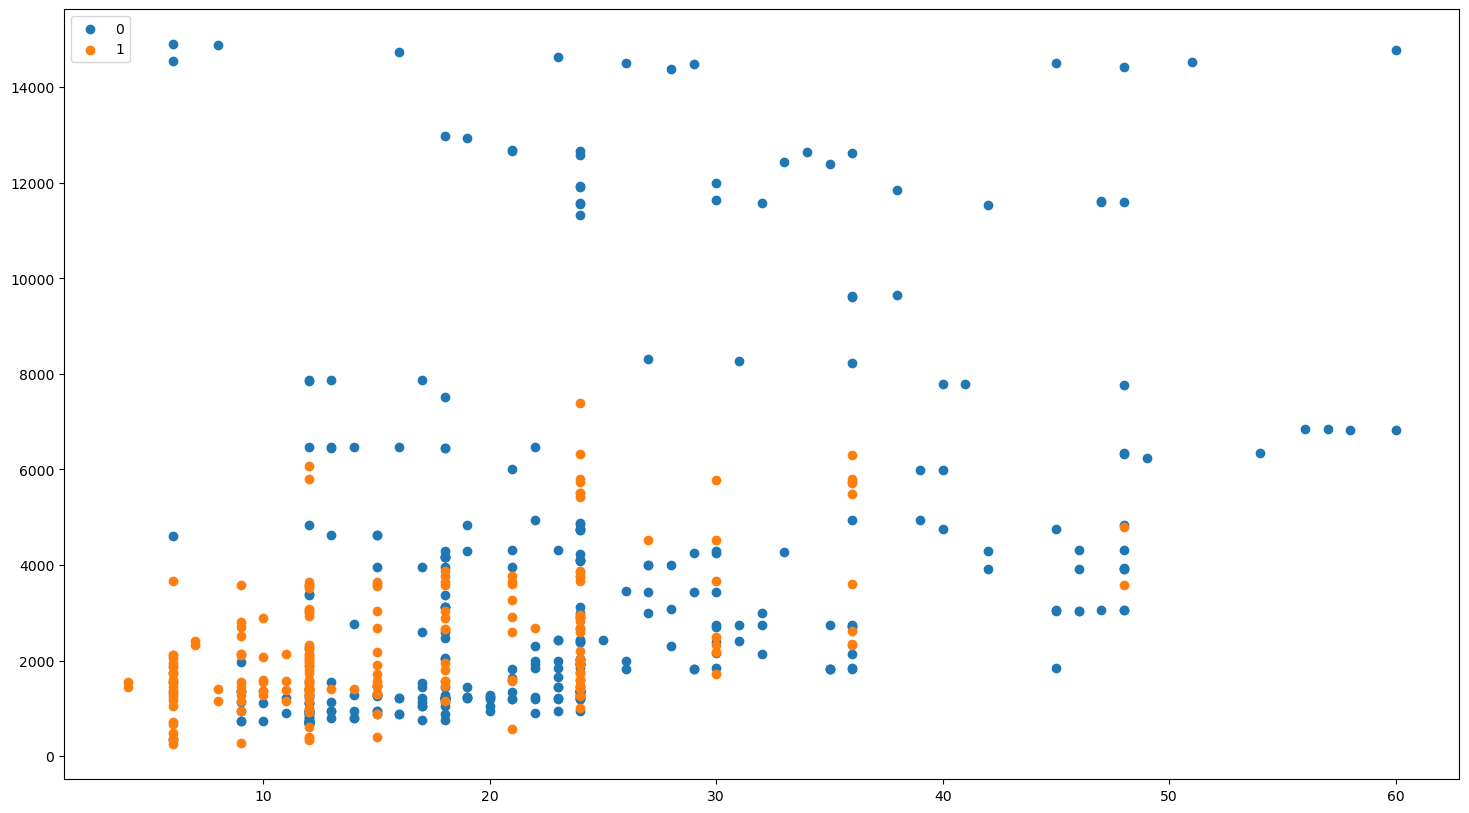

In [20]:
from imblearn.combine import SMOTEENN 
SMOTEENN = SMOTEENN()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = SMOTEENN.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

In [21]:
from imblearn.combine import SMOTETomek

In [22]:
smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_resample(X,y)

In [23]:
X_res.shape,y_res.shape

((1240, 20), (1240,))